#Import Libraries

In [ ]:
#Environment Setup
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing necessary libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

#Download Dataset

In [ ]:
# Load the CSV file into a pandas DataFrame
data = pd.read_csv('/content/drive/MyDrive/survey.csv')

##Load Dataset

In [ ]:
# Display the first few rows of the DataFrame
data.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [ ]:
# Display the last few rows of the DataFrame
data.tail()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN
1258,2016-02-01 23:04:31,25,Male,United States,IL,No,Yes,Yes,Sometimes,26-100,...,Don't know,Maybe,No,Some of them,No,No,No,Don't know,No,NaN


In [ ]:
# Get the shape of the DataFrame (number of rows and columns)
data.shape

(1259, 27)

In [ ]:
# Display concise summary of the DataFrame including column data types and missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

#Data Pre-Processing

##Removing Unnecessary Columns

<Axes: xlabel='Country'>

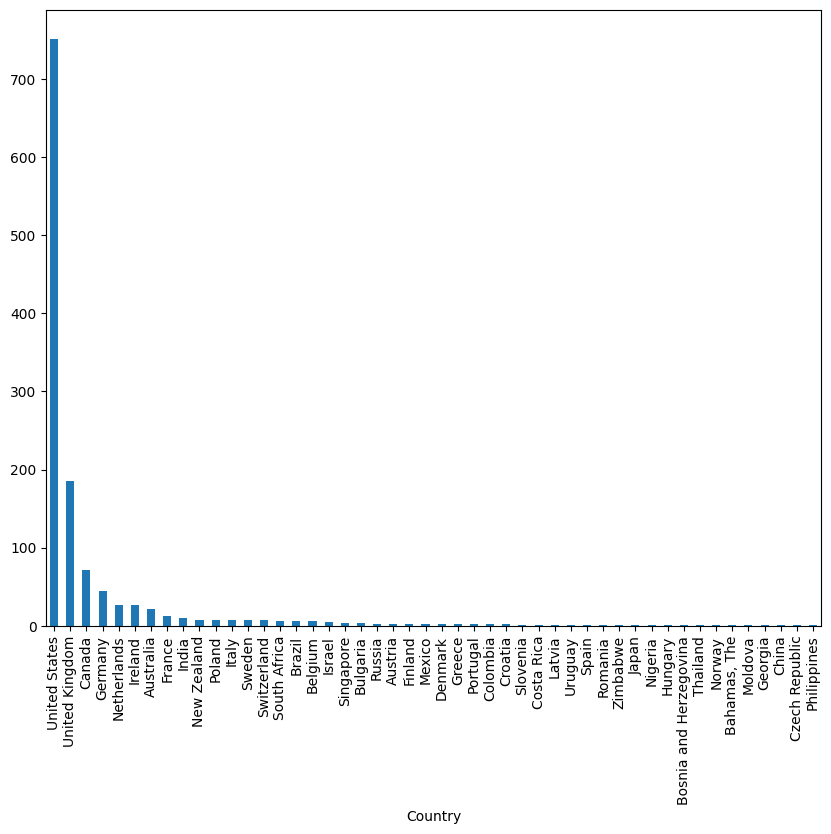

In [ ]:
# Plot a bar chart to visualize the distribution of values in the 'Country' column
data['Country'].value_counts().plot(kind='bar',figsize=(10,8))

We are removing the country column since the countries are not evenly distributed, keeping this column will induce bias in our model.  

(as the above graph shows)

So we will be removing country and state columns.  

We will also remove timestamp and comments columns as they do not contribute to providing relevant information.


In [ ]:
# Remove columns 'Timestamp', 'Country', 'state', and 'comments' from the DataFrame
data.drop(['Timestamp','Country','state','comments'],axis=1, inplace=True)

In [ ]:
data.head()

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,NaN,No,Yes,Often,6-25,No,Yes,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,NaN,No,No,Rarely,More than 1000,No,No,Don't know,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,NaN,No,No,Rarely,6-25,No,Yes,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,NaN,Yes,Yes,Often,26-100,No,Yes,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,NaN,No,No,Never,100-500,Yes,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


##Handling Null Values And Dealing With Wrongly Entered Data

In [ ]:
# Count the number of missing values in each column of the DataFrame
data.isnull().sum()

Age                            0
Gender                         0
self_employed                 18
family_history                 0
treatment                      0
work_interfere               264
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
dtype: int64

In [ ]:
# Count the occurrences of different values in the 'self_employed' column
data['self_employed'].value_counts()

self_employed
No     1095
Yes     146
Name: count, dtype: int64

In [ ]:
# Fill missing values in the 'self_employed' column with the mode (most frequent value)
data['self_employed'].fillna(data['self_employed'].mode()[0], inplace=True)

In [ ]:
# Count the occurrences of different values in the 'work_interfere' column
data['work_interfere'].value_counts()

work_interfere
Sometimes    465
Never        213
Rarely       173
Often        144
Name: count, dtype: int64

In [ ]:
# Fill missing values in the 'work_interfere' column with the mode (most frequent value)
data['work_interfere'].fillna(data['work_interfere'].mode()[0], inplace=True)

<Axes: xlabel='Age'>

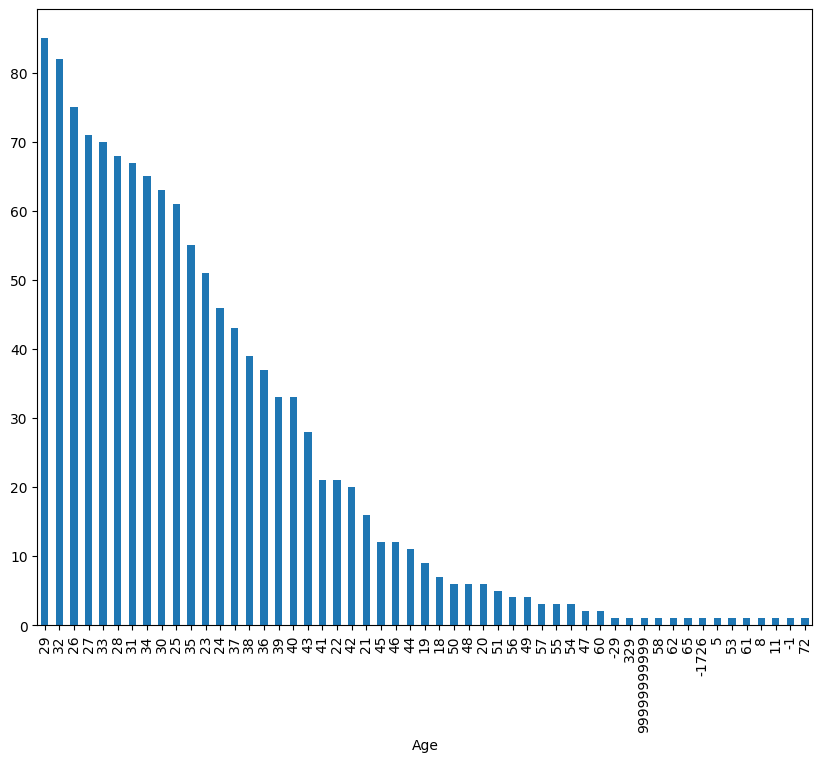

In [ ]:
# Plot a bar chart to visualize the distribution of values in the 'Age' column
data['Age'].value_counts().plot(kind='bar',figsize=(10,8))

In [ ]:
# Remove rows where the 'Age' column contains values outside the range of 18 to 60
data.drop(data[(data['Age']>60) | (data['Age']<18)].index, inplace=True)

<Axes: xlabel='Gender'>

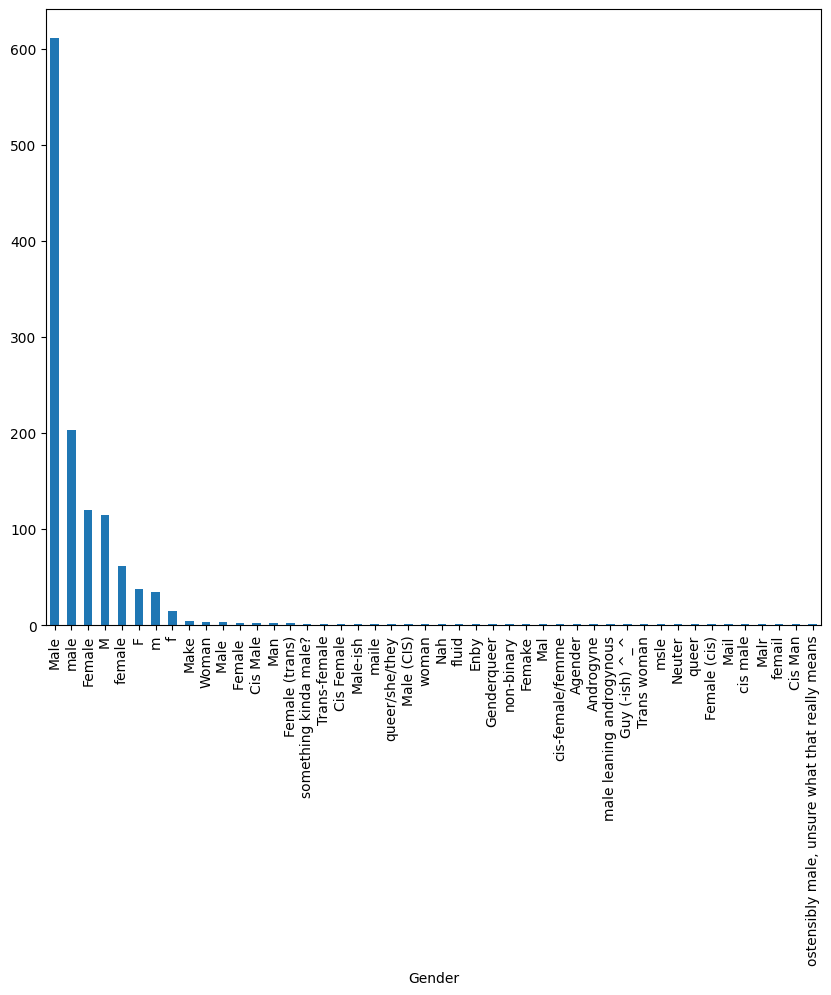

In [ ]:
# Plot a bar chart to visualize the distribution of values in the 'Gender' column
data['Gender'].value_counts().plot(kind='bar',figsize=(10,8))

In [ ]:
# Standardize gender categories to 'Male', 'Female', and 'Non-Binary'
data['Gender'].replace(['Male', 'male', 'M', 'm', 'Male', 'Cis Male',
'Man', 'cis male', 'Mail', 'Male-ish', 'Male (CIS)', 'Cis Man', 'msle', 'Malr', 'Mal', 'maile', 'Make',], 'Male', inplace = True)

data['Gender'].replace(['Female', 'female', 'F', 'f', 'Woman', 'Female', 'femail', 'Cis Female', 'cis-female/femme', 'Femake', 'Female (cis)', 'woman',], 'Female', inplace = True)

data["Gender"].replace(['Female (trans)', 'queer/she/they', 'non-binary',
'fluid', 'queer', 'Androgyne', 'Trans-female', 'male leaning androgynous', 'Agender', 'A little about you', 'Nah', 'All', 'ostensibly male, unsure what that really means', 'Genderqueer', 'Enby', 'p', 'Neuter', 'something kinda male?', 'Guy (-ish) ^_^', 'Trans woman',], 'Non-Binary', inplace = True)

#Data Analysis And Visualization

##Univariate Analysis

<ipython-input-22-fd12288625f6>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(data["Age"])


Text(0.5, 0, 'Age')

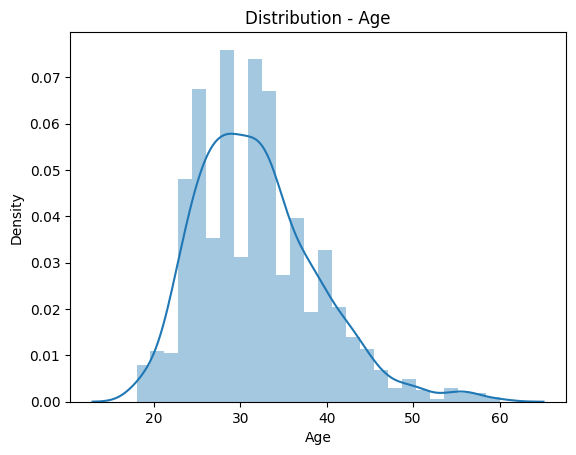

In [ ]:
# Create a seaborn distribution plot to visualize the distribution of ages
sb.distplot(data["Age"])
plt.title("Distribution - Age")
plt.xlabel("Age")

##Bivariate Analysis

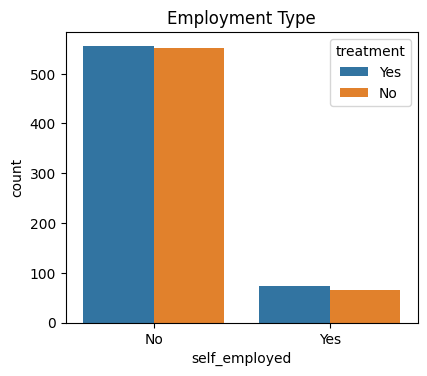

In [ ]:
# Create a subplot with a count plot to visualize the distribution of treatment status among different employment types
plt.figure(figsize=(10, 40))
plt.subplot(9, 2, 1)
sb.countplot(x='self_employed', hue='treatment', data=data)
plt.title('Employment Type')
plt.show()

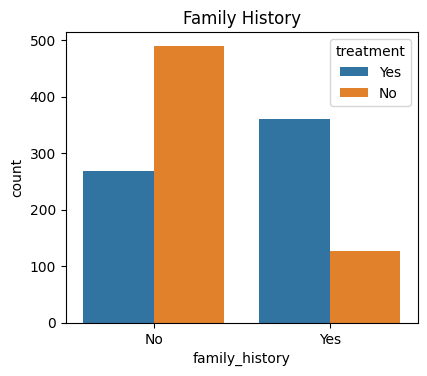

In [ ]:
# Create a subplot with a count plot to visualize the distribution of treatment status among different family history categories
plt.figure(figsize=(10,40))
plt.subplot(9,2,2)
sb.countplot(x='family_history',hue='treatment',data=data)
plt.title('Family History')
plt.show()

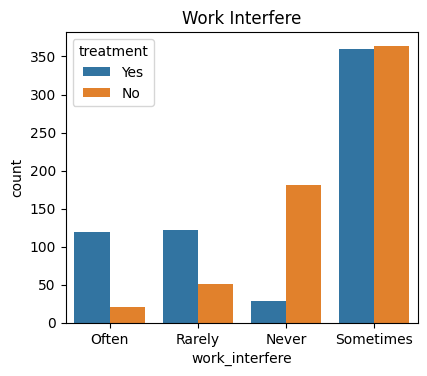

In [ ]:
# Create a subplot with a count plot to visualize the distribution of treatment status among different categories of work interference
plt.figure(figsize=(10,40))
plt.subplot(9,2,3)
sb.countplot(x='work_interfere',hue='treatment',data=data)
plt.title('Work Interfere')
plt.show()

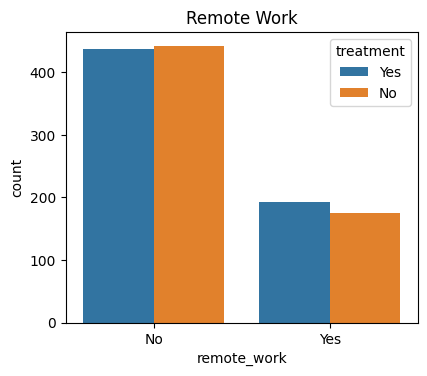

In [ ]:
# Create a subplot with a count plot to visualize the distribution of treatment status among different categories of remote work
plt.figure(figsize=(10,40))
plt.subplot(9,2,4)
sb.countplot(x='remote_work',hue='treatment',data=data)
plt.title('Remote Work')
plt.show()

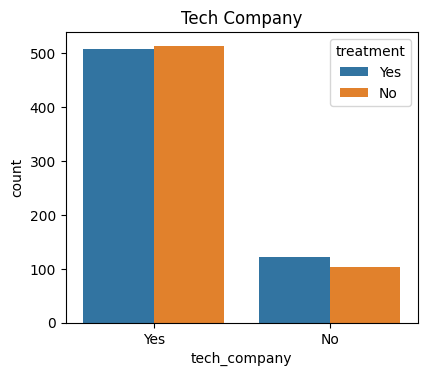

In [ ]:
# Create a subplot with a count plot to visualize the distribution of treatment status among different categories of tech company affiliation
plt.figure(figsize=(10,40))
plt.subplot(9,2,5)
sb.countplot(x='tech_company',hue='treatment',data=data)
plt.title('Tech Company')
plt.show()

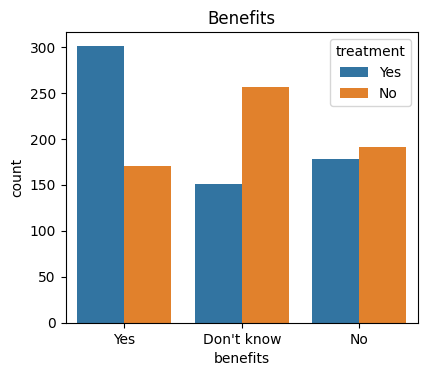

In [ ]:
# Create a subplot with a count plot to visualize the distribution of treatment status among different categories of benefits
plt.figure(figsize=(10,40))
plt.subplot(9,2,6)
sb.countplot(x='benefits',hue='treatment',data=data)
plt.title('Benefits')
plt.show()

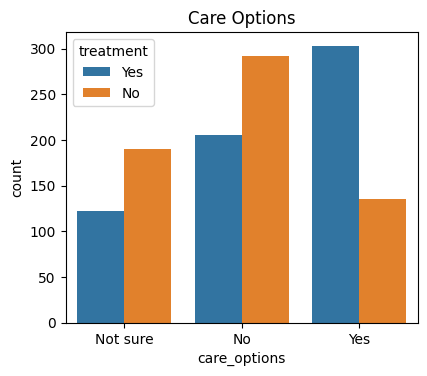

In [ ]:
# Create a subplot with a count plot to visualize the distribution of treatment status among different categories of Care Options
plt.figure(figsize=(10,40))
plt.subplot(9,2,7)
sb.countplot(x='care_options',hue='treatment',data=data)
plt.title('Care Options')
plt.show()

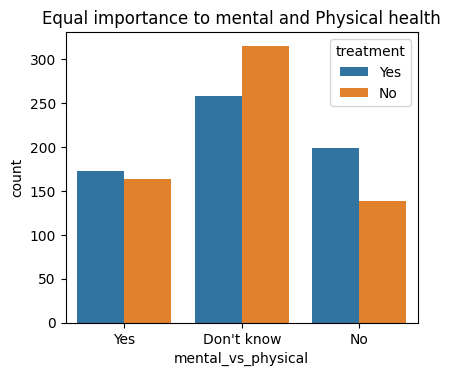

In [ ]:
# Create a subplot with a count plot to visualize the distribution of treatment status among different categories of Equal importance to mental and physical health
plt.figure(figsize=(10,40))
plt.subplot(9,2,8)
sb.countplot(x='mental_vs_physical',hue='treatment',data=data)
plt.title('Equal importance to mental and Physical health')
plt.show()

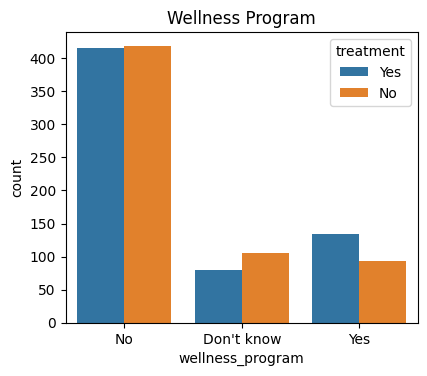

In [ ]:
# Create a subplot with a count plot to visualize the distribution of treatment status among different categories of Wellnes Program
plt.figure(figsize=(10,40))
plt.subplot(9,2,9)
sb.countplot(x='wellness_program',hue='treatment',data=data)
plt.title('Wellness Program')
plt.show()

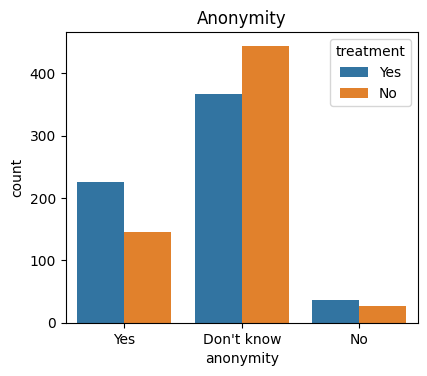

In [ ]:
# Create a subplot with a count plot to visualize the distribution of treatment status among different categories of Anonymity
plt.figure(figsize=(10,40))
plt.subplot(9,2,10)
sb.countplot(x='anonymity',hue='treatment',data=data)
plt.title('Anonymity')
plt.show()

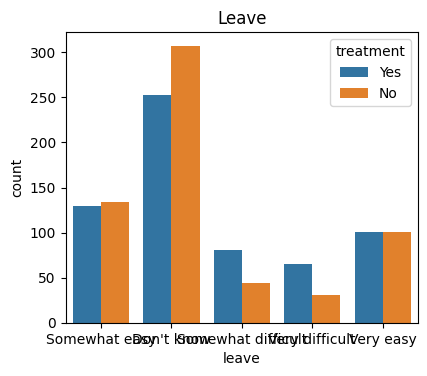

In [ ]:
# Create a subplot with a count plot to visualize the distribution of treatment status among different categories of leave
plt.figure(figsize=(10,40))
plt.subplot(9,2,11)
sb.countplot(x='leave',hue='treatment',data=data)
plt.title('Leave')
plt.show()

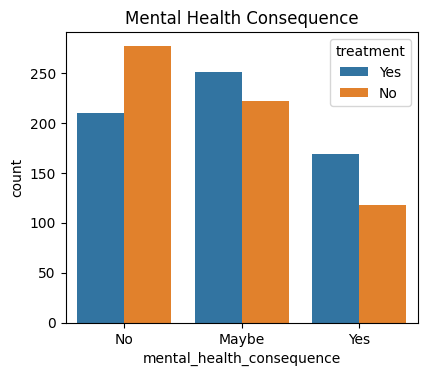

In [ ]:
# Create a subplot with a count plot to visualize the distribution of treatment status among different categories of mental health consequence
plt.figure(figsize=(10,40))
plt.subplot(9,2,12)
sb.countplot(x='mental_health_consequence',hue='treatment',data=data)
plt.title('Mental Health Consequence')
plt.show()

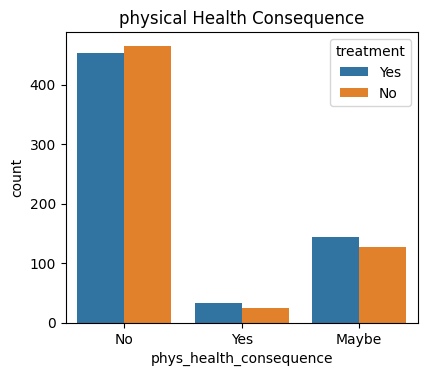

In [ ]:
# Create a subplot with a count plot to visualize the distribution of treatment status among different categories of physical health conequence
plt.figure(figsize=(10,40))
plt.subplot(9,2,13)
sb.countplot(x='phys_health_consequence',hue='treatment',data=data)
plt.title('physical Health Consequence')
plt.show()

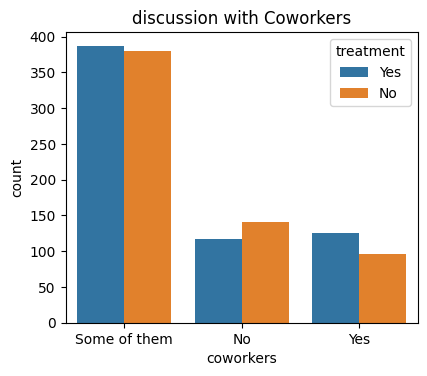

In [ ]:
# Create a subplot with a count plot to visualize the distribution of treatment status among different categories of discussion with coworkers
plt.figure(figsize=(10,40))
plt.subplot(9,2,14)
sb.countplot(x='coworkers',hue='treatment',data=data)
plt.title('discussion with Coworkers')
plt.show()

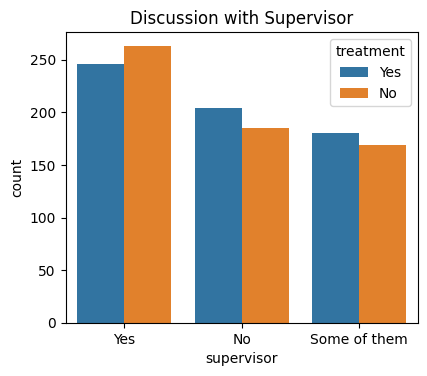

In [ ]:
# Create a subplot with a count plot to visualize the distribution of treatment status among different categories of discussion with supervisor
plt.figure(figsize=(10,40))
plt.subplot(9,2,15)
sb.countplot(x='supervisor',hue='treatment',data=data)
plt.title('Discussion with Supervisor')
plt.show()

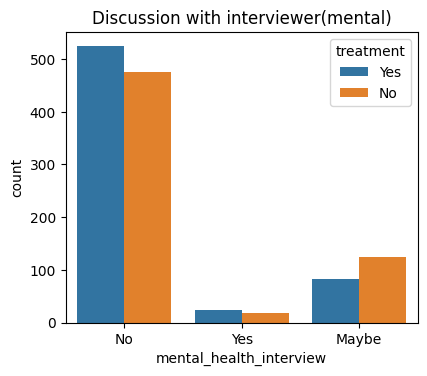

In [ ]:
# Create a subplot with a count plot to visualize the distribution of treatment status among different categories of discussion with interviewer(mental)
plt.figure(figsize=(10,40))
plt.subplot(9,2,16)
sb.countplot(x='mental_health_interview',hue='treatment',data=data)
plt.title('Discussion with interviewer(mental)')
plt.show()

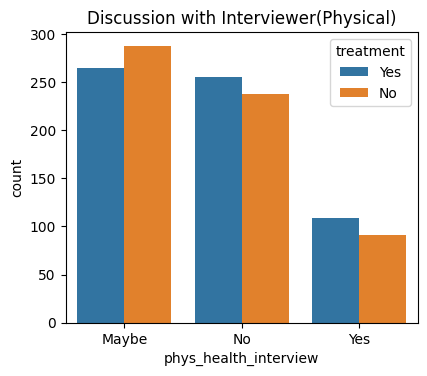

In [ ]:
# Create a subplot with a count plot to visualize the distribution of treatment status among different categories of discussion with interviewer(physical)
plt.figure(figsize=(10,40))
plt.subplot(9,2,17)
sb.countplot(x='phys_health_interview',hue='treatment',data=data)
plt.title('Discussion with Interviewer(Physical)')
plt.show()

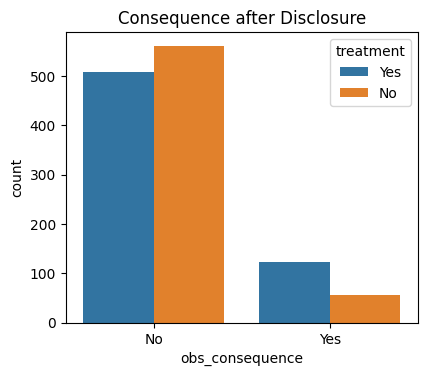

In [ ]:
# Create a subplot with a count plot to visualize the distribution of treatment status among different categories of consequence after disclosure
plt.figure(figsize=(10,40))
plt.subplot(9,2,18)
sb.countplot(x='obs_consequence',hue='treatment',data=data)
plt.title('Consequence after Disclosure')
plt.show()

##Descriptive Analysis


In [ ]:
# Generate descriptive statistics for all columns in the DataFrame
data.describe(include='all')

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
count,1247.000000,1247,1247,1247,1247,1247,1247,1247,1247,1247,...,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247
unique,NaN,5,2,2,2,4,6,2,2,3,...,3,5,3,3,3,3,3,3,3,2
top,NaN,Male,No,No,Yes,Sometimes,6-25,No,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,No,Maybe,Don't know,No
freq,NaN,980,1107,759,630,724,288,879,1023,471,...,811,560,487,918,767,509,1000,553,573,1068
mean,31.971131,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,7.052598,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,27.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,36.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#Model Building

##Handling Categorical Values

In [ ]:
# Splitting the DataFrame into features (X) and target variable (y)
X = data.drop('treatment', axis = 1)
y = data['treatment']

In [ ]:
# Importing necessary modules for data preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

In [ ]:
# Create a ColumnTransformer to apply ordinal encoding to selected categorical features
# while preserving the remaining features
ct = ColumnTransformer ([('oe',OrdinalEncoder(), ['Gender', 'self_employed', 'family_history',
'work_interfere', 'no_employees', 'remote_work', 'tech_company', 'benefits', 'care_options', 'wellness_program', 'seek_help',
'anonymity', 'leave', 'mental_health_consequence', 'phys_health_consequence', 'coworkers', 'supervisor',
'mental_health_interview', 'phys_health_interview', 'mental_vs_physical', 'obs_consequence'])], remainder='passthrough')

In [ ]:
# Transform features using the ColumnTransformer object
X = ct.fit_transform(X)

In [ ]:
# Encode the target variable using LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

##Splitting Data into Train And Test

In [ ]:
# Importing necessary module for splitting data into training and testing sets
from sklearn.model_selection import train_test_split

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=49)

In [ ]:
# Check the shapes of the training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((872, 22), (375, 22), (872,), (375,))

##Comparing Accuracy Of Various Models

In [ ]:
# Importing classifiers and evaluation metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import accuracy_score, roc_curve, confusion_matrix, classification_report, auc, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

###Logistic Regression

In [ ]:
# Instantiate and fit the Logistic Regression model
log_reg = LogisticRegression(random_state=0)
log_reg.fit(X_train, y_train)

# Predict using the trained model
pred_log_reg = log_reg.predict(X_test)

# Calculate accuracy
accuracy_log_reg = accuracy_score(y_test, pred_log_reg)
print('Accuracy of Logistic Regression:', accuracy_log_reg)

Accuracy of Logistic Regression: 0.7493333333333333


In [ ]:
# Generate the classification report
print('Classification Report :')
print(classification_report(y_test, pred_log_reg))

Classification Report :
              precision    recall  f1-score   support

           0       0.73      0.78      0.76       186
           1       0.77      0.71      0.74       189

    accuracy                           0.75       375
   macro avg       0.75      0.75      0.75       375
weighted avg       0.75      0.75      0.75       375



In [ ]:
# confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, pred_log_reg))

Confusion Matrix:
[[146  40]
 [ 54 135]]


###KNeighborsClassifier


In [ ]:
# Instantiate and fit the KNN model
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)

# Predict using the trained model
pred_knn = knn_classifier.predict(X_test)

# Calculate accuracy
accuracy_knn = accuracy_score(y_test, pred_knn)
print('Accuracy of K-Nearest Neighbors:', round(accuracy_knn,4)*100)

Accuracy of K-Nearest Neighbors: 62.93


In [ ]:
# Generate the classification report
print('Classification Report :')
print(classification_report(y_test, pred_knn))

Classification Report :
              precision    recall  f1-score   support

           0       0.61      0.69      0.65       186
           1       0.65      0.57      0.61       189

    accuracy                           0.63       375
   macro avg       0.63      0.63      0.63       375
weighted avg       0.63      0.63      0.63       375



In [ ]:
# confusion matrix
print('Confusion Matrix:')
confusion_matrix(y_test, pred_knn)

Confusion Matrix:


array([[133,  53],
       [ 78, 111]])

###DecisionTreeClassifier

In [ ]:
# Instantiate and fit the Decision Tree Classifier model
dt_classifier = DecisionTreeClassifier(random_state=49)
dt_classifier.fit(X_train, y_train)

# Predict using the trained model
pred_dt = dt_classifier.predict(X_test)

# Calculate accuracy
accuracy_dt = accuracy_score(y_test, pred_dt)
print('Accuracy of Decision Tree Classifier:', round(accuracy_dt,4)*100)

Accuracy of Decision Tree Classifier: 70.39999999999999


In [ ]:
# Generate the classification report
print('Classification Report :')
print(classification_report(y_test, pred_dt))

Classification Report :
              precision    recall  f1-score   support

           0       0.68      0.74      0.71       186
           1       0.72      0.66      0.69       189

    accuracy                           0.70       375
   macro avg       0.70      0.70      0.70       375
weighted avg       0.70      0.70      0.70       375



In [ ]:
# confusion matrix
print('Confusion Matrix:')
confusion_matrix(y_test, pred_dt)

Confusion Matrix:


array([[138,  48],
       [ 65, 124]])

###Random Forest Classifier


In [ ]:
# Instantiate and fit the Random Forest model
random_forest = RandomForestClassifier(random_state=49)
random_forest.fit(X_train, y_train)

# Predict using the trained model
pred_rf = random_forest.predict(X_test)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, pred_rf)
print('Accuracy of Random Forest Classifier:', round(accuracy_rf,4)*100)

Accuracy of Random Forest Classifier: 78.4


In [ ]:
# Generate the classification report
print('Classification Report :')
print(classification_report(y_test, pred_rf))

Classification Report :
              precision    recall  f1-score   support

           0       0.75      0.79      0.77       186
           1       0.78      0.75      0.76       189

    accuracy                           0.77       375
   macro avg       0.77      0.77      0.77       375
weighted avg       0.77      0.77      0.77       375



In [ ]:
# confusion matrix
print('Confusion Matrix:')
confusion_matrix(y_test, pred_rf)

Confusion Matrix:


array([[147,  39],
       [ 48, 141]])

###AdaBoost Classifier

In [ ]:
# Instantiate and fit the AdaBoost Classifier model
adaboostClassifier = AdaBoostClassifier(random_state=49)
adaboostClassifier.fit(X_train, y_train)

# Predict using the trained model
pred_abc = adaboostClassifier.predict(X_test)

# Calculate accuracy
accuracy_abc = accuracy_score(y_test, pred_abc)
print('Accuracy of AdaBoost Classifier:', round(accuracy_abc,4)*100)

Accuracy of AdaBoost Classifier: 78.67


In [ ]:
# Generate the classification report
print('Classification Report :')
print(classification_report(y_test, pred_abc))

Classification Report :
              precision    recall  f1-score   support

           0       0.78      0.80      0.79       186
           1       0.80      0.77      0.78       189

    accuracy                           0.79       375
   macro avg       0.79      0.79      0.79       375
weighted avg       0.79      0.79      0.79       375



In [ ]:
# confusion matrix
print('Confusion Matrix:')
confusion_matrix(y_test, pred_abc)

Confusion Matrix:


array([[149,  37],
       [ 43, 146]])

###Gradient Boosting Classifier

In [ ]:
# Instantiate and fit the Gradient Boosting model
gradientBoostingClassifier = GradientBoostingClassifier(random_state=49)
gradientBoostingClassifier.fit(X_train, y_train)

# Predict using the trained model
pred_gbc = gradientBoostingClassifier.predict(X_test)

# Calculate accuracy
accuracy_gbc = accuracy_score(y_test, pred_gbc)
print('Accuracy of Gradient Boosting Classifier:', round(accuracy_gbc,4)*100)

Accuracy of Gradient Boosting Classifier: 78.4


In [ ]:
# Generate the classification report
print('Classification Report :')
print(classification_report(y_test, pred_gbc))

Classification Report :
              precision    recall  f1-score   support

           0       0.77      0.80      0.79       186
           1       0.80      0.77      0.78       189

    accuracy                           0.78       375
   macro avg       0.78      0.78      0.78       375
weighted avg       0.78      0.78      0.78       375



In [ ]:
# confusion matrix
print('Confusion Matrix:')
confusion_matrix(y_test, pred_gbc)

Confusion Matrix:


array([[149,  37],
       [ 44, 145]])

###XGB Classifier

In [ ]:
# Instantiate and fit the Random Forest model
xgb_classifier = XGBClassifier(random_state=49)
xgb_classifier.fit(X_train, y_train)

# Predict using the trained model
pred_xgb = xgb_classifier.predict(X_test)

# Calculate accuracy
accuracy_xgb = accuracy_score(y_test, pred_xgb)
print('Accuracy of XGB Classifier:', round(accuracy_xgb,4)*100)

Accuracy of XGB Classifier: 72.53


In [ ]:
# Generate the classification report
print('Classification Report :')
print(classification_report(y_test, pred_xgb))

Classification Report :
              precision    recall  f1-score   support

           0       0.72      0.74      0.73       186
           1       0.74      0.71      0.72       189

    accuracy                           0.73       375
   macro avg       0.73      0.73      0.73       375
weighted avg       0.73      0.73      0.73       375



In [ ]:
# confusion matrix
print('Confusion Matrix:')
confusion_matrix(y_test, pred_xgb)

Confusion Matrix:


array([[138,  48],
       [ 55, 134]])

## Accuracy Comparision Plot

<ipython-input-5-8865289cae29>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=data, palette='viridis')


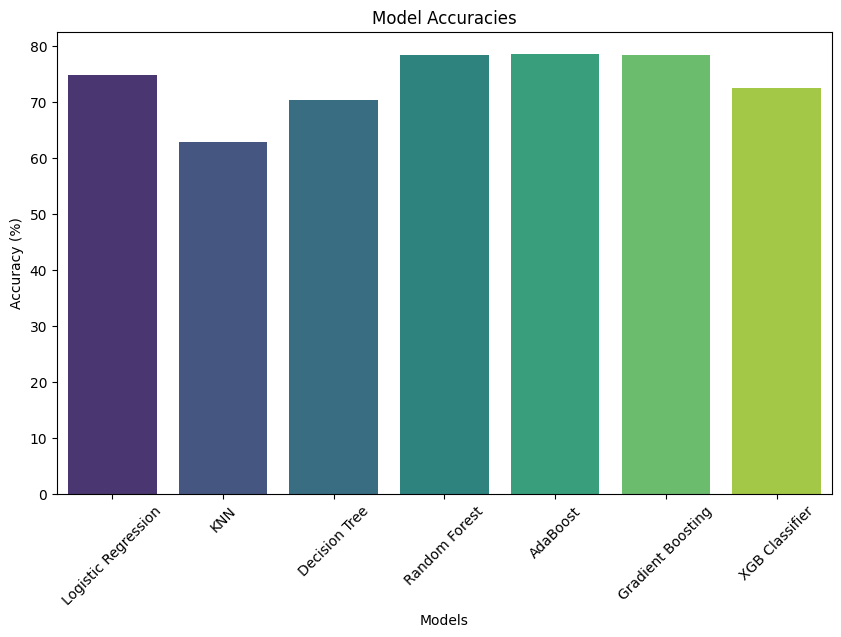

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Accuraries = [74.93, 62.93, 70.39, 78.40, 78.67, 78.4, 72.53]
Models = ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'AdaBoost', 'Gradient Boosting', 'XGB Classifier']

data = pd.DataFrame({
    'Model': Models,
    'Accuracy': Accuraries
})

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=data, palette='viridis')
plt.title('Model Accuracies')
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.xticks(rotation=45)
plt.show()

##Hyperparameter Tuning Of Selected Model

### Adaboost Classifier

In [ ]:
# Define parameter grid for tuning
param_grid = {
    # Number of estimators (base models)
    'n_estimators': [50, 100, 200],
    # Learning rate
    'learning_rate': [0.01, 0.1, 1.0],
    'base_estimator': [DecisionTreeClassifier(max_depth=1),
     DecisionTreeClassifier(max_depth=2)]  # Base estimator
}

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=adaboostClassifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_paramaters = grid_search.best_params_ # change variable name
best_model = grid_search.best_estimator_

# Predict using the best estimator
pred_best = best_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

In [ ]:
# Calculate accuracy
accuracy_best = accuracy_score(y_test, pred_best)
print('Accuracy of Tuned AdaBoost Classifier:', round(accuracy_best, 4) * 100)
print('Best parameters:', best_paramaters)

Accuracy of Tuned AdaBoost Classifier: 78.93
Best parameters: {'base_estimator': DecisionTreeClassifier(max_depth=2), 'learning_rate': 0.01, 'n_estimators': 200}


In [ ]:
# Generate the classification report
print('Classification Report for Tuned Model:')
print(classification_report(y_test, pred_best))

Classification Report for Tuned Model:
              precision    recall  f1-score   support

           0       0.77      0.83      0.80       186
           1       0.82      0.75      0.78       189

    accuracy                           0.79       375
   macro avg       0.79      0.79      0.79       375
weighted avg       0.79      0.79      0.79       375



In [ ]:
# confusion matrix
print('Confusion Matrix for Tuned Model:')
confusion_matrix(y_test, pred_best)

Confusion Matrix for Tuned Model:


array([[154,  32],
       [ 47, 142]])

### XGB Classifier

In [ ]:
# Define parameter grid for tuning
param_grid = {
    # Number of boosting rounds
    'n_estimators': [50, 100, 150, 100],
    # Learning rate
    'learning_rate': [0.001, 0.01, 0.1, 0.5, 1.0],
    # Maximum tree depth
    'max_depth': [3, 5, 7],
    # Minimum sum of instance weight (hessian) needed in a child
    'min_child_weight': [1, 3, 5],
    # Subsample ratio of the training instances
    'subsample': [0.6, 0.8, 1.0],
    # Subsample ratio of columns when constructing each tree
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_paramaters = grid_search.best_params_
xgb_model = grid_search.best_estimator_

# Predict using the best estimator
pred_xgb_tuned = xgb_model.predict(X_test)

In [ ]:
# Calculate accuracy
accuracy_best = accuracy_score(y_test, pred_xgb_tuned)
print('Accuracy of Tuned XGB Classifier:', round(accuracy_best, 4) * 100)
print('Best parameters:', best_paramaters)

Accuracy of Tuned XGB Classifier: 79.47
Best parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 50, 'subsample': 0.6}


In [ ]:
# Generate the classification report
print('Classification Report for Tuned Model:')
print(classification_report(y_test, pred_xgb_tuned))

Classification Report for Tuned Model:
              precision    recall  f1-score   support

           0       0.79      0.81      0.80       186
           1       0.80      0.78      0.79       189

    accuracy                           0.79       375
   macro avg       0.79      0.79      0.79       375
weighted avg       0.79      0.79      0.79       375



In [ ]:
# confusion matrix
print('Confusion Matrix for Tuned Model:')
confusion_matrix(y_test, pred_xgb_tuned)

Confusion Matrix for Tuned Model:


array([[150,  36],
       [ 41, 148]])

### Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0]
}

# Instantiate the Gradient Boosting model
gradientBoostingClassifier = GradientBoostingClassifier(random_state=49)

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(estimator=gradientBoostingClassifier, param_grid=param_grid,
                           cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters
best_paramaters = grid_search.best_params_
print("Best parameters found: ", best_paramaters)

# Train the model with the best parameters
best_gradientBoostingClassifier = grid_search.best_estimator_

# Predict using the trained model
pred_gbc = best_gradientBoostingClassifier.predict(X_test)

# Calculate accuracy
accuracy_gbc = accuracy_score(y_test, pred_gbc)
print('Accuracy of tuned Gradient Boosting Classifier:', round(accuracy_gbc, 4) * 100)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters found:  {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 150, 'subsample': 0.8}
Accuracy of tuned Gradient Boosting Classifier: 78.4


In [ ]:
# Calculate accuracy
accuracy_best = accuracy_score(y_test, pred_gbc)
print('Accuracy of Tuned Gradient Classifier:', round(accuracy_best, 4) * 100)
print('Best parameters:', best_paramaters)

Accuracy of Tuned XGB Classifier: 78.4
Best parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 150, 'subsample': 0.8}


In [ ]:
# Generate the classification report
print('Classification Report for Tuned Model:')
print(classification_report(y_test, pred_gbc))

Classification Report for Tuned Model:
              precision    recall  f1-score   support

           0       0.76      0.82      0.79       186
           1       0.81      0.75      0.78       189

    accuracy                           0.78       375
   macro avg       0.79      0.78      0.78       375
weighted avg       0.79      0.78      0.78       375



In [ ]:
# confusion matrix
print('Confusion Matrix for Tuned Model:')
confusion_matrix(y_test, pred_gbc)

Confusion Matrix for Tuned Model:


array([[153,  33],
       [ 48, 141]])

##Evaluating Performance Of Model








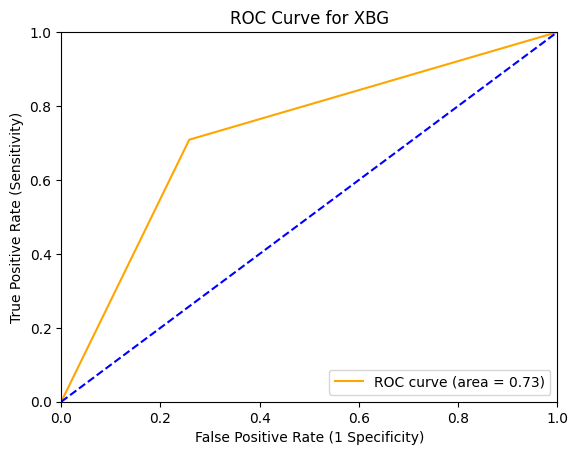

(array([0.        , 0.25806452, 1.        ]),
 array([0.        , 0.70899471, 1.        ]),
 array([2, 1, 0]))

In [ ]:
# Calculate and plot the ROC curve for the initial model
from sklearn import metrics

#Calculating the ROC Curve
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, pred_xgb)

#Calculating the Area Under the Curve (AUC)
roc_auc_xgb = metrics.auc(fpr_xgb, tpr_xgb)

#Plotting the ROC curve and the baseline
plt.plot(fpr_xgb, tpr_xgb, color='orange', label='ROC curve (area = %0.2f)' % roc_auc_xgb)
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')

#Setting the Plot Limits and Labels
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC Curve for XBG')
plt.xlabel('False Positive Rate (1 Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")
plt.show()

roc_curve(y_test, pred_xgb)

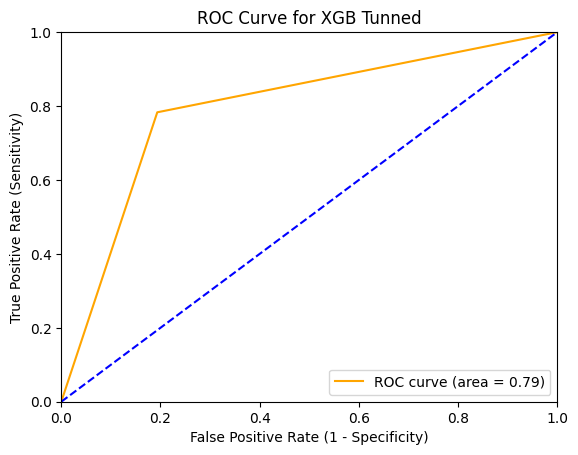

(array([0.        , 0.19354839, 1.        ]),
 array([0.        , 0.78306878, 1.        ]),
 array([2, 1, 0]))

In [ ]:
# Calculate and plot the ROC curve for the tuned model
from sklearn import metrics

#Calculating the ROC Curve
fpr_xgb_tuned, tpr_xgb_tuned, thresholds_xgb_tuned = roc_curve(y_test, pred_xgb_tuned)

#Calculating the Area Under the Curve (AUC)
roc_auc_xgb_tuned = metrics.auc(fpr_xgb_tuned, tpr_xgb_tuned)

#Plotting the ROC curve and the baseline
plt.plot(fpr_xgb_tuned, tpr_xgb_tuned, color='orange', label='ROC curve (area = %0.2f)' % roc_auc_xgb_tuned)
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')

#Setting the Plot Limits and Labels
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC Curve for XGB Tunned')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")
plt.show()

roc_curve(y_test, pred_xgb_tuned)


##Saving The Model

In [ ]:
import pickle
# Save the trained model to a file
pickle.dump(xgb_model, open('model.pkl','wb'))
print("Model saved successfully!")

Model saved successfully!
